# Categorical Data imputation:

## Most Frequent value imputation:

**Mode** are measures of the central tendency. These values are used to define the various parameters of the given data set.

What is Mode?

A mode is the most frequent value or item of the data set. A data set can generally have one or more than one mode value. If the data set has one mode then it is called “Uni-modal”. Similarly, If the data set contains 2 modes then it is called “Bimodal” and if the data set contains 3 modes then it is known as “Trimodal”. If the data set consists of more than one mode then it is known as “multi-modal”(can be bimodal or trimodal). There is no mode for a data set if every number appears only once.

**Mode Formula**

Mode = Highest Frequency Term

### Import Libraries:

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset:

In [143]:
df=pd.read_csv('../Data/data_science_job.csv')
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14.0,NaN,NaN,42.0,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14.0,NaN,NaN,52.0,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,50-99,Pvt Ltd,44.0,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,0.0,500-999,Pvt Ltd,97.0,0.0


In [144]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


,enrollee_id,city_development_index,experience,training_hours,target
count,19158.000000,18679.000000,19093.000000,18392.000000,19158.000000
mean,16875.358179,0.828951,9.928036,65.185787,0.249348
std,9616.292592,0.123334,6.505268,59.885626,0.432647
min,1.000000,0.448000,0.000000,1.000000,0.000000
25%,8554.250000,0.740000,4.000000,23.000000,0.000000
50%,16982.500000,0.903000,9.000000,47.000000,0.000000
75%,25169.750000,0.920000,16.000000,88.000000,0.000000
max,33380.000000,0.949000,20.000000,336.000000,1.000000


In [145]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

**Extract Categorical columns**

**Condition**
- Data missing compeletly at random (MCAR).
- Data less than 5% missing.

In [146]:
df1=df.select_dtypes(exclude=np.number)
df1

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,company_size,company_type
0,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,NaN,NaN
1,city_40,Male,No relevent experience,no_enrollment,Graduate,STEM,50-99,Pvt Ltd
2,city_21,NaN,No relevent experience,Full time course,Graduate,STEM,NaN,NaN
3,city_115,NaN,No relevent experience,NaN,Graduate,Business Degree,NaN,Pvt Ltd
4,city_162,Male,Has relevent experience,no_enrollment,Masters,STEM,50-99,Funded Startup
...,...,...,...,...,...,...,...,...
19153,city_173,Male,No relevent experience,no_enrollment,Graduate,Humanities,NaN,NaN
19154,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,NaN,NaN
19155,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,50-99,Pvt Ltd
19156,city_65,Male,Has relevent experience,no_enrollment,High School,NaN,500-999,Pvt Ltd


In [147]:
df1=[col for col in df1.columns if 0 < df[col].isnull().mean() * 100 < 5]
df1

['enrolled_university', 'education_level']

**What to check:**
- Most freq value in data is more than other

In [148]:
df['enrolled_university'].mode()[0]

'no_enrollment'

<Axes: xlabel='enrolled_university'>

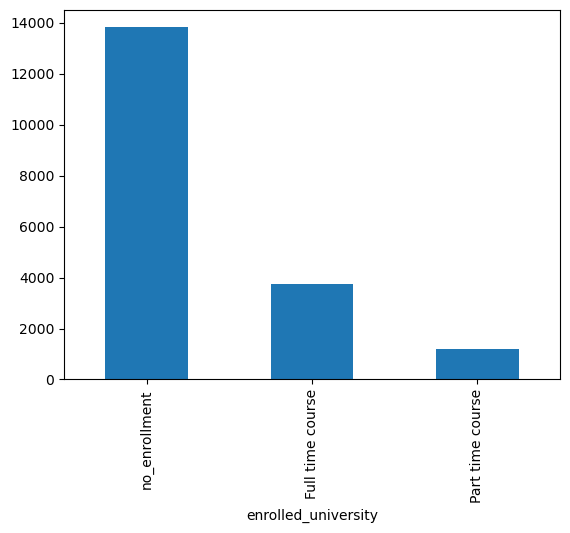

In [149]:
df['enrolled_university'].value_counts().plot(kind='bar')

**Check missing value distribution on original set**

Text(0.5, 1.0, ' Most freq value occures and how much missing value in it')

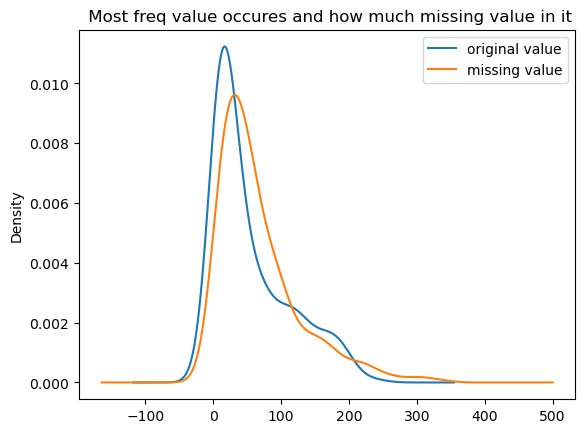

In [150]:
plt.figure()
ax=plt.subplot(1,1,1)

df[df['enrolled_university']=='no_enrollment']['training_hours'].value_counts().plot(kind='kde',label='original value')
df[df['enrolled_university'].isnull()]['training_hours'].plot(kind='kde',label='missing value')

ax.legend()
plt.title(' Most freq value occures and how much missing value in it')


**Make a another variable just to check before imputation values**

In [151]:
before=df[df['enrolled_university']=='no_enrollment']['training_hours']

**Now fill the missing values with most freq value then compare distribution of original value before and after filling the values.** 

In [152]:
df['enrolled_university'].fillna('no_enrollment',inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8552\2495020246.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['enrolled_university'].fillna('no_enrollment',inplace=True)


<Axes: xlabel='enrolled_university'>

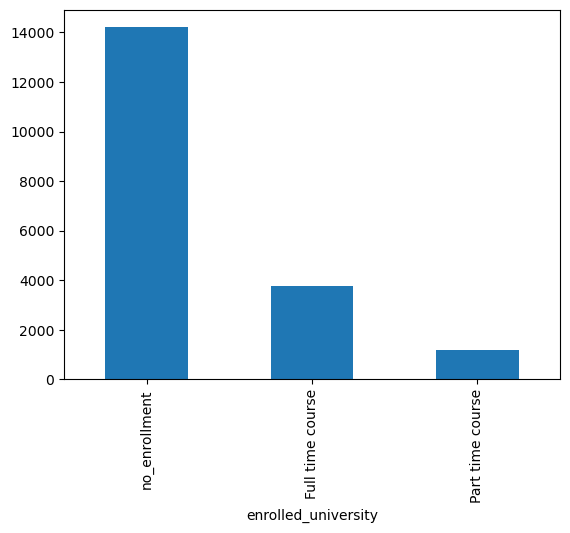

In [153]:
df['enrolled_university'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Before imputation & After Imputation')

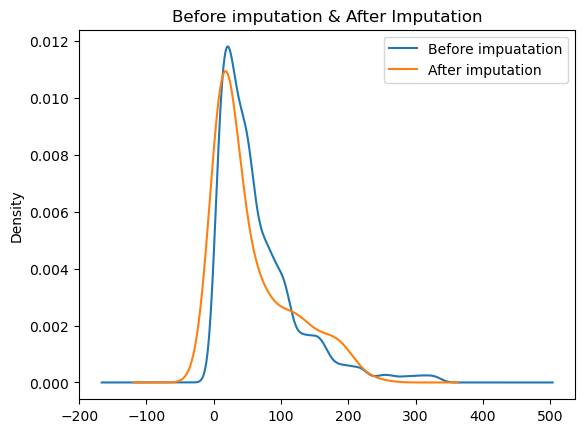

In [154]:
plt.figure()
ax=plt.subplot(1,1,1)

before.plot(kind='kde',label='Before impuatation')
df[df['enrolled_university']=='no_enrollment']['training_hours'].value_counts().plot(kind='kde',label='After imputation')

ax.legend()
plt.title('Before imputation & After Imputation')

**So it well n good we can now fill with most freq value**